In [1]:
# setup dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 
import re

In [2]:
# Upload csv file
shoe_data = pd.read_csv("clean_data.csv", low_memory=False)

In [3]:
# display data
shoe_data.head()

,id,brand,primaryCategories,colors,ean / upc,manufacturer,name,prices.amountMax,prices.amountMin,prices.availability,...,color 4,color 5,color 6,category 1,category 2,category 3,category 4,category 5,category 6,category 7
0,AV2A4MxtvKc47QAVol_G,Nomad,Shoes,"Bluewhite Flower Burst,Blue/White Flower Burst",638000000000,Nomad Footwear,Women's Puddles Boot,36.00,36.00,False,...,Burst,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,Backpacking Boots,All Women's Shoes
1,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
2,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
3,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN
4,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN


In [4]:
# find the different kinds of shoes we are looking for: flats, athletic shoe, boot, sandal/filp flops, heels/pumps, other

names = ["boot" if "boot" in name else "other" for name in shoe_data["name"]]

#print(names)

for index,name in shoe_data["name"].iteritems():
    #print(name)
    if bool(re.search("boot*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "boot"
    elif bool(re.search("flat*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "flat"
    elif bool(re.search("loafer*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "flat"
    elif bool(re.search("athletic*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("sneaker*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("walk*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("run*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "athletic"
    elif bool(re.search("sandal*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "sandal"
    elif bool(re.search("flip*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "sandal"
    elif bool(re.search("heel*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "heel"
    elif bool(re.search("pump*",name.lower())):
        shoe_data.loc[index,"Shoe Category"] = "heel"
    else:
        shoe_data.loc[index,"Shoe Category"] = "other"

shoe_category = shoe_data["Shoe Category"] 

shoe_data["Shoe Category"] = shoe_category

shoe_data.head()

,id,brand,primaryCategories,colors,ean / upc,manufacturer,name,prices.amountMax,prices.amountMin,prices.availability,...,color 5,color 6,category 1,category 2,category 3,category 4,category 5,category 6,category 7,Shoe Category
0,AV2A4MxtvKc47QAVol_G,Nomad,Shoes,"Bluewhite Flower Burst,Blue/White Flower Burst",638000000000,Nomad Footwear,Women's Puddles Boot,36.00,36.00,False,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,Backpacking Boots,All Women's Shoes,boot
1,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat
2,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat
3,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat
4,AVpe3xOJLJeJML43xIBp,Brinley Co.,Shoes,"Brown,Pink,Blush,Black,Grey",870000000000,Brinley Co.,Womens Pointed Toe Strappy Gladiator Flats,19.95,19.95,True,...,NaN,NaN,Womens Shoes,Clothing,Women's Shoes,All Womens Shoes,Shoes,All Women's Shoes,NaN,flat


In [5]:
# count the types of shoes
shoe_count = shoe_data["Shoe Category"].value_counts()

shoe_count

boot        3393
other       2028
sandal      1234
flat        1210
athletic    1118
heel        1017
Name: Shoe Category, dtype: int64

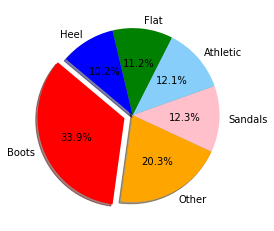

In [6]:
# create pie chart for the different kinds of shoes for women that are produced based on this dataset

# labels for the pie chart
labels = ["Boots", "Other", "Sandals", "Athletic", "Flat", "Heel"]

# the number of shoes produced for each category
sizes = shoe_count

# set colors for each shoe category for our pie chart
colors = ["red", "orange", "pink", "lightskyblue", "green", "blue"]

# seperate the "Others" section from the others
explode = (0.1, 0, 0, 0, 0, 0)

# create pie chart to display kinds of shoe values for women
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

# save chart as png file
plt.savefig("Images/Pie Chart for Shoe Categories.png")

plt.show()

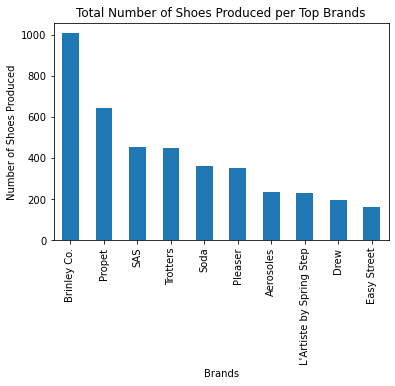

In [7]:
# list the brand that produces the highest number of shoes based on frequency
brands = shoe_data["brand"].value_counts()

# sort by the top 10 brands that produce the most shoes
#top_brands = shoe_data.groupby("brand").shoe_counts.nlargest(10).reset_index()
top_brands = brands.head(10)

# create bar chart
top_brands.plot(kind="bar")
plt.ylabel("Number of Shoes Produced")
plt.xlabel("Brands")
plt.title("Total Number of Shoes Produced per Top Brands")

# save chart as png file
plt.savefig("Images/Bar Chart for Top Brands.png")

plt.show()

In [8]:
# find average price for each line and create new column for it
shoe_data['Avg Price'] = (shoe_data['prices.amountMin']+shoe_data['prices.amountMax'])/2

# group by brand name
groupedBrand = shoe_data.groupby(['brand'])

# get average price per brand
totalAvg = groupedBrand['Avg Price'].mean()

# create a list of top brand names
brandList = list(brands.head(10).keys())

# get average price for top brands
TopBrandAvg = totalAvg[totalAvg.keys().isin(brandList)]
TopBrandAvg

brand
Aerosoles                    94.373574
Brinley Co.                  35.858352
Drew                        140.198112
Easy Street                  68.527107
L'Artiste by Spring Step    120.229258
Pleaser                      74.318257
Propet                       64.509953
SAS                         141.614198
Soda                         32.756333
Trotters                    104.821002
Name: Avg Price, dtype: float64

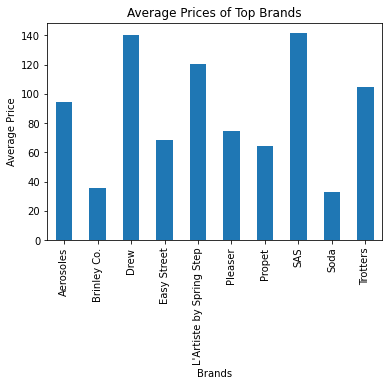

In [9]:
# create bar chart for average prices of top brands
TopBrandAvg.plot(kind="bar")
plt.ylabel("Average Price")
plt.xlabel("Brands")
plt.title("Average Prices of Top Brands")

# save figure
plt.savefig("Images/Average Prices of Top Brands.png")

# show chart
plt.show()

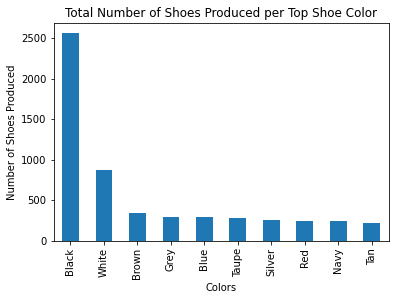

Black     2561
White      874
Brown      346
Grey       290
Blue       289
Taupe      275
Silver     258
Red        245
Navy       245
Tan        220
Name: color 1, dtype: int64


In [10]:
# get the Top 10 colors and make a visualization
colors = shoe_data["color 1"].value_counts()
top_colors = colors.head(10)

# create bar chart for colors vs the number of shoes produced
top_colors.plot(kind="bar")
plt.ylabel("Number of Shoes Produced")
plt.xlabel("Colors")
plt.title("Total Number of Shoes Produced per Top Shoe Color")

# save figure as ong file
plt.savefig("Images/Bar Chart for # of Shoes and Top Colors.png")

plt.show()
print(colors.head(10))

In [11]:
# find the average price per color
shoe_data['Avg Price'] = (shoe_data['prices.amountMin']+shoe_data['prices.amountMax'])/2
groupedColor = shoe_data.groupby(['color 1'])
totalAvg = groupedColor['Avg Price'].mean()
colorList = list(colors.head(10).keys())
TopColorAvg = totalAvg[totalAvg.keys().isin(colorList)]
TopColorAvg

color 1
Black     74.181667
Blue      60.872595
Brown     59.479827
Grey      47.895793
Navy      64.330571
Red       60.580163
Silver    56.232558
Tan       51.047909
Taupe     49.811164
White     92.963673
Name: Avg Price, dtype: float64

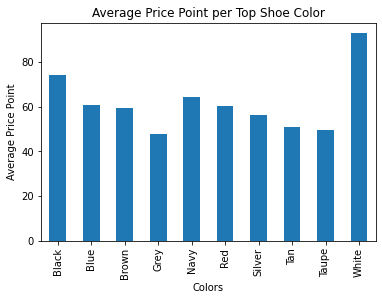

In [12]:
# create bar chart for average price per color
TopColorAvg.plot(kind="bar")
plt.ylabel("Average Price Point")
plt.xlabel("Colors")
plt.title("Average Price Point per Top Shoe Color")

# save figure as ong file
plt.savefig("Images/Bar Chart for Average Price per Color.png")

plt.show()

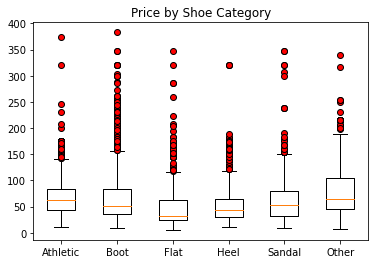

In [14]:
price = shoe_data

# Price.drop_duplicates(subset='id', keep='last', inplace=True)
price = price.loc[price["Avg Price"].between(0,500)]
Athletic = price.loc[price["Shoe Category"]=="athletic"]
Boot = price.loc[price["Shoe Category"]=="boot"]
Flat = price.loc[price["Shoe Category"]=="flat"]
Heel = price.loc[price["Shoe Category"]=="heel"]
Sandal = price.loc[price["Shoe Category"]=="sandal"]
Other = price.loc[price["Shoe Category"]=="other"]
data = [Athletic["Avg Price"],Boot["Avg Price"],Flat["Avg Price"],Heel["Avg Price"],Sandal["Avg Price"],Other["Avg Price"]]
ticks = ["Athletic","Boot","Flat","Heel","Sandal","Other"]

fig1,ax1 = plt.subplots()
flierprops = dict(markerfacecolor = 'red')
ax1.boxplot(data, flierprops = flierprops)
ax1.set_title("Price by Shoe Category")
ax1.set_xticklabels(ticks)

# save plot as png file
plt.savefig("Images/Box Plot for Price Vs. Shoe Categories.png")

plt.show()

In [15]:
# find the unique sizes for the prices.size column
shoe_data["size"]=shoe_data["prices.size"].str.extract("(\d*)")
shoe_data["size"]=pd.to_numeric(shoe_data["size"],errors='coerce')
shoe_data["size"].unique()

array([ 11.,   9.,   6.,   7.,   8.,  10.,  12.,   5.,   4.,  nan,  38.,
        14.,  13.,  39.,  36.,  37.,  41.,  42.,  40.,  35.,  15.,  16.,
        43.,  55.,   1.,   3.,   2.,  44., 600.,  17.])

In [16]:
# create size dataframe
sizeDF = shoe_data.loc[shoe_data["size"].between(4,12)]
sizeDF = sizeDF.loc[sizeDF["Avg Price"].between(0,500)]
sizeDF["size"].unique()

array([11.,  9.,  6.,  7.,  8., 10., 12.,  5.,  4.])

The r-value is: 0.061574380653851034


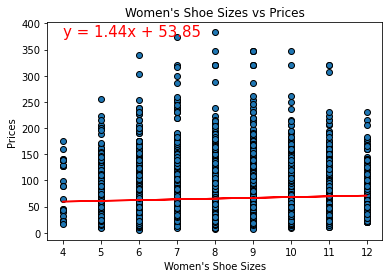

In [19]:
# create linear regression line for sizes vs prices
(slope,intercept,rvalue,pvalue,stderr)=linregress(sizeDF["size"],sizeDF["Avg Price"])
regress_values = sizeDF["size"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# create scatter plot
plt.scatter(sizeDF["size"],sizeDF["Avg Price"],edgecolors="black")
plt.plot(sizeDF["size"],regress_values,"r-")
plt.annotate(line_eq,(4,375),fontsize = 15,color="red")
plt.ylabel("Prices")
plt.xlabel("Women's Shoe Sizes")
plt.title("Women's Shoe Sizes vs Prices")

# show regression line
print(f"The r-value is: {rvalue}")

# save plot as png file
plt.savefig("Images/Scatter Plot for Sizes vs Price.png")

plt.show()